<script>
    function findAncestor (el, name) {
        while ((el = el.parentElement) && el.nodeName.toLowerCase() !== name);
        return el;
    }
    function colorAll(el, textColor) {
        el.style.color = textColor;
        Array.from(el.children).forEach((e) => {colorAll(e, textColor);});
    }
    function setBackgroundImage(src, textColor) {
        var section = findAncestor(document.currentScript, 'section');
        if (section) {
            section.setAttribute('data-background-image', src);
			if (textColor) colorAll(section, textColor);
        }
    }
</script>

<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-image: linear-gradient(#2774AE,#ebf8e1, #FFD100);
  position: static;
}
</style>

<h1 style='color:white'> Statistics 21 <br/> Python & Other Technologies for Data Science </h1>

<h3 style='color:white'>Vivian Lew, PhD - Wednesday, Week 7</h3>

<script>
    setBackgroundImage('Window1.jpg');
</script>

# Numpy - efficient numerical computing

## Week 7 Wednesday

## Thanks to Miles Chen, PhD

### Adapted from *Python for Data Science* by Jake VanderPlas

- NumPy means Numerical Python. 
- Numpy is a Python library that performs numerical calculations.
- NumPy is written in C and it is very fast.
- NumPy is based in linear algebra and the associated math
- The core object is the N-Dimensional array (ndarray) a data structure for efficient computation on vectors and matrices which is "atomic" like vectors and arrays in R
- A NumPy array can have one or more dimensions:

    * A One dimension array (1D) is a  vector.
    * A Two dimensional arrays (2D) is a matrix.
    * A higher dimensional array is a tensor.

Numpy arrays are structures many use to perform math operations on lots of data

## ALWAYS: `import numpy as np`
This is a convention that everyone follows. If you do not do this, other people may have difficulty reading or incorporating your code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.__version__

'1.24.3'

## Numpy arrays
- like Python lists, NDarrays are mutable
- unlike lists, NDarrays can only contain data of the same data (usually numeric) type
- we use tuples to index Numpy arrays
- when you are reading about Numpy, axes mean dimensions

## Creating Arrays
- there are several ways
- direct creation with `np.array()` - requires a sequence
- Create a list with square brackets, and put that inside `np.array()`

In [3]:
np.array( [1,2,3] )

array([1, 2, 3])

In [4]:
a = np.array([1, 2, 3])
print(a)

[1 2 3]


In [5]:
print([1,2,3]) # a printed list has commas

[1, 2, 3]


A printed array has no commas. A printed list has commas.

In [6]:
type(a)

numpy.ndarray

Tuples will work too

In [7]:
print(np.array((1, 2, 3)))

[1 2 3]


but not multiple arguments

In [8]:
np.array(1, 2, 3)

TypeError: array() takes from 1 to 2 positional arguments but 3 were given

In [9]:
a_2 = np.arange(0, 12).reshape(4, 3)
a_2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [10]:
type(a_2), a_2.ndim

(numpy.ndarray, 2)

In [11]:
a_2 = np.array(range(12)).reshape(4, 3)
a_2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

## Array sequences
make sequences with

- `np.arange(start, stop, step)`  
-  makes an **a**rray **range** from start (inclusive) to stop (exclusive), by step

In [12]:
range(0, 10, 2) # range object in regular python

range(0, 10, 2)

In [13]:
list(range(0, 10, 2))

[0, 2, 4, 6, 8]

In [14]:
np.arange(0, 10, 2)  # numpy's arange function

array([0, 2, 4, 6, 8])

In [15]:
np.array(range(0,10,2)) # equivalent 'manual' creation

array([0, 2, 4, 6, 8])

In [16]:
np.arange(0, 100, 5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
       85, 90, 95])

In [17]:
np.arange(20) # quickest

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [18]:
np.arange(0, 1, .10) # can float step

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

## Linspace sequence

- `np.linspace(start, stop, num)`
- Generates evenly spaced numbers over a specified interval. Returns num evenly spaced samples, calculated over the interval [start, stop].
- Can optionally exclude the endpoint of the interval.

In [19]:
np.linspace(0, 100, 11)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [20]:
np.linspace(0, 100, 10)

array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ])

In [21]:
np.linspace(0, 100, 10, endpoint = False)  # optional parameter endpoint to exclude the stop value

array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.])

In [22]:
np.linspace(0, 100, 9, endpoint = False) 
# if you use the endpoint argument, the last number in the array will depend on the output length

array([ 0.        , 11.11111111, 22.22222222, 33.33333333, 44.44444444,
       55.55555556, 66.66666667, 77.77777778, 88.88888889])

### nice for plotting 

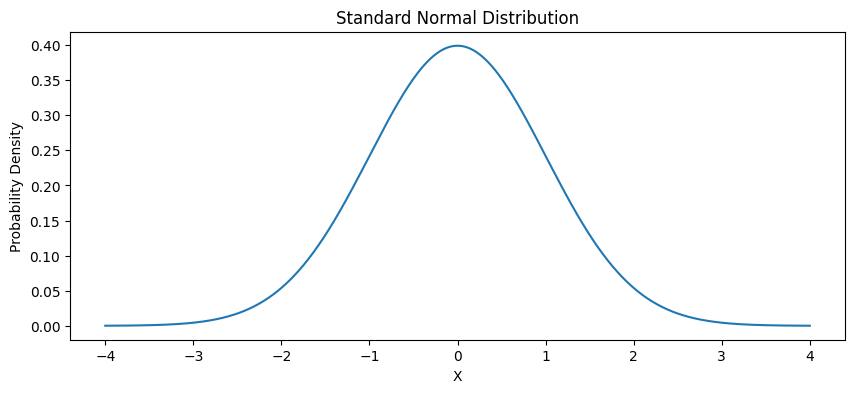

In [23]:
x = np.linspace(-4, 4, 1000)
# Define the standard normal distribution
mean = 0
std_dev = 1
y = (1 / (np.sqrt(2 * np.pi * std_dev**2))
    ) * np.exp(- (x - mean)**2 / (2 * std_dev**2))

plt.figure(figsize=(10,4))  # width: 10 inches, height: 3 inches
plt.plot(x, y)
# Add title and axis labels
plt.title('Standard Normal Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.show()

## Creating in Two dimensions

In [24]:
a_2 = np.arange(12).reshape(4, 3)
a_2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [25]:
type(a_2), a_2.ndim

(numpy.ndarray, 2)

In [26]:
# Create a 2D array (matrix) from a list of lists
array_2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(array_2)
(type(array_2), array_2.ndim)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


(numpy.ndarray, 2)

When you print a multidimensional array, the number of opening square brackets is the number of dimensions. 
The above array is 2 dimensional

But if the dimensions don't match, you'll get an error

In [27]:
e = np.array([ [1,2,3],[4,5] ])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

## Creating a 2D array (matrix) from a list of lists or tuples


In [28]:
array_2 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(array_2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [29]:
array_2t = np.array([(1, 2, 3), (4, 5, 6), (7, 8, 9)])
print(array_2t)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Upcasting (like Coercion in R)

If you mix data types in an array, the values of the more restrictive types will get upcast to the value of the less restrictive type.

In [30]:
b = np.array([1, 2, 3.0, False, True])
print(b) # the 3.0 is a float and will upcast other values to floats

[1. 2. 3. 0. 1.]


In [31]:
c = np.array([1, 2., "3", True, False]) # upcast (coerced) to strings
print(c)

['1' '2.0' '3' 'True' 'False']


In [32]:
a = np.array([1, 2, 3, True, False]) # upcast (coerced) to integer
print(a)

[1 2 3 1 0]


## Other ways to generate arrays

In [33]:
print(np.zeros(5)) # makes an array (vector) of 0s
print(f"The number of dimensions is: {np.zeros(5).ndim}")

[0. 0. 0. 0. 0.]
The number of dimensions is: 1


In [34]:
np.zeros(5, dtype = int)  # default is to make floats, you can specify ints

array([0, 0, 0, 0, 0])

In [35]:
np.zeros((2, 2))  # give dimensions as a tuple: makes an array 2x2

array([[0., 0.],
       [0., 0.]])

In [36]:
np.zeros((2, 3, 4)) # 3 dimensional array 2 x 3 x 4... 
# notice the order of creation: 2 'sheets' of 3 rows by 4 columns, dimensions is 3

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [37]:
np.zeros((2,3,4,5))
# make 2 'blocks', each with 3 'sheets', of 4 rows, and 5 columns dimensions is 4

array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]])

In addition to `np.zeros` there is `np.ones` and `np.full` which can create new arrays.

In [38]:
np.ones(5)  # similar, but inserts ones

array([1., 1., 1., 1., 1.])

In [39]:
np.full((2,3), 1.2)  # similar, but you specify one value that gets repeated

array([[1.2, 1.2, 1.2],
       [1.2, 1.2, 1.2]])

And in the future, you may need one of these:

In [40]:
np.identity(8, dtype="int")

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1]])

In [41]:
np.identity(8, dtype="int").ndim

2

## Making arrays of random numbers
numpy uses the Mersenne Twister
- All random generator functions begin with `np.random.`

In [42]:
np.random.seed(1)  # seed the generator for reproducibility

In [43]:
np.random.random(5)  # random.random for random values on the interval [0,1)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01])

In [44]:
np.random.randn(5)
# random.randn for random normal from standard normal
# this command will produce 5 values

array([-1.10593508, -1.65451545, -2.3634686 ,  1.13534535, -1.01701414])

In [45]:
np.random.normal(100, 15, (2, 8)).round(0)
# random.normal for random normal from normal with mean 10 and sd 3
# arranged in a 2 x 4 matrix

array([[110.,  87., 127.,  83., 103., 108.,  92., 111.],
       [106., 108.,  99., 129., 105., 117.,  83.,  87.]])

In [46]:
np.random.randint(0, 10, 20) 
# select random integers from 0 inclusive to 10 exclusive
# and return 20 values

array([7, 7, 9, 8, 6, 9, 3, 7, 7, 4, 5, 9, 3, 6, 8, 0, 2, 7, 7, 9])

In [47]:
# simulate dice rolls
np.random.randint(1,7, 50)

array([4, 5, 3, 1, 1, 2, 2, 6, 4, 1, 1, 6, 6, 5, 6, 3, 5, 4, 6, 4, 6, 1,
       4, 5, 4, 5, 5, 6, 5, 2, 1, 5, 3, 1, 6, 3, 5, 2, 2, 1, 3, 5, 5, 1,
       5, 2, 5, 2, 1, 3])

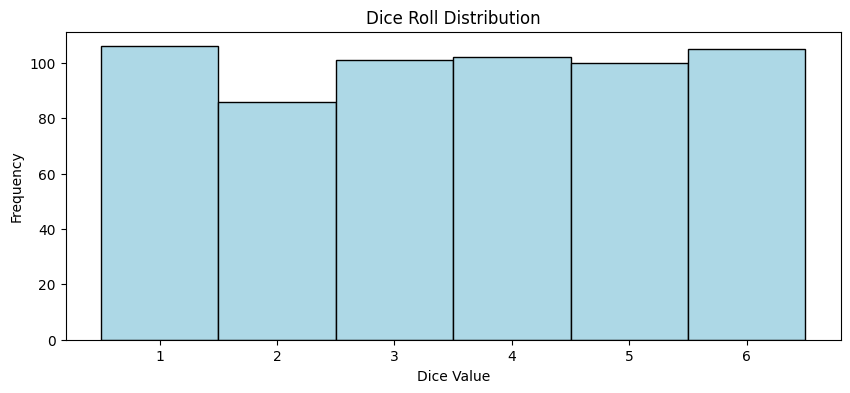

In [48]:
data = np.random.randint(1,7,600)
plt.figure(figsize=(10,4))  # width: 10 inches, height: 3 inches
plt.hist(data, bins=range(1,8), align='left', 
         color='lightblue', edgecolor='black')

plt.title('Dice Roll Distribution')
plt.xlabel('Dice Value')
plt.ylabel('Frequency')

plt.show()

More random generation at: https://numpy.org/doc/stable/reference/random/index.html

# Array Attributes
- `array.ndim` for number of dimensions 
- `array.shape` for the size of each dimension 
- `array.dtype` for the data type 

In [49]:
x = np.ones((3,4))
print(x)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [50]:
x.ndim

2

In [51]:
x.shape

(3, 4)

In [52]:
x.dtype

dtype('float64')

In [53]:
y = np.arange(0, 12, 1)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [54]:
y.ndim

1

In [55]:
y.shape # a one dimensional array. Note that there's no second dimension.

(12,)

## Reshaping Arrays

- `np.reshape(array, [new shape])` returns a new array that is reshaped
    - you can also use the method `array.reshape(shape)`
- `array.T` is the transpose method, but leaves the original array unaffected


In [56]:
j = np.arange(0,12,1)
print(j) # j is one dimensional

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [57]:
k = np.reshape(j, (3,4))  # note that it fills row-wise unlike R
print(k)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [58]:
j # j is left unchanged

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [59]:
j.reshape(4,3)  # the method reshape() on the array j

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [60]:
j # j is left unchanged here as well

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [61]:
print(k)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [62]:
print(k.T)  # the transpose of k

[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [63]:
print(k) # calling k.T does not modify the original k array

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [64]:
# can combine (chain) the above Numpy methods and steps into one:
l = np.arange(0,12,1).reshape((3,4)).T
# create a-range >> reshape >> transpose
print(l)

[[ 0  4  8]
 [ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]]


In [65]:
j

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [66]:
j.reshape((3, -1))  # using -1 for a dimension will ask python to figure out the number to use for that dimension

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [67]:
j.reshape((-1, 4))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [68]:
j.reshape((2, -1, 2)) # two sheets, unknown number of rows, 2 columns

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]]])

In [69]:
y = np.arange(0,12, 1)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [70]:
y.shape

(12,)

In [71]:
print(y.T) # the transpose of a one dimensional array doesn't suddenly give it a second dimension

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [72]:
y.T.shape

(12,)

In [73]:
z = np.reshape(y, (1,12)) # the array now has two dimensions
print(z)

[[ 0  1  2  3  4  5  6  7  8  9 10 11]]


In [74]:
z.shape

(1, 12)

In [75]:
print(z.T)  # with two dimensions, the transpose become a column

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]


In [76]:
z.T.shape

(12, 1)

# Subsetting and Slicing Arrays
- very similar to subsetting and slicing lists

In [77]:
y = np.arange(0,12, 1)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [78]:
y[4]

4

In [79]:
y.shape

(12,)

In [80]:
y[4:6]

array([4, 5])

you can slice with a second colon. The array gets subset with `array[start:stop:step]`

In [81]:
y[1:8:3]

array([1, 4, 7])

In [82]:
np.arange(100)[:100:2] # to get even values

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

In [83]:
np.arange(0,100,2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])

Subsetting and slicing higher dimensional arrays is similar, and uses a comma to separate subsetting instructions for each dimension.

In [84]:
z = np.reshape(y, [3,4])
print(z)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [85]:
print(z[1,2]) # returns what is at row index 1, col index 2

6


In [86]:
type(z[1,2]) # with only one value, the type is the integer.
# It is no longer an array.

numpy.int64

In [87]:
print(z)
z[0:2, 0:2] # note the type remains a numpy array

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


array([[0, 1],
       [4, 5]])

In [88]:
print(z[2,:]) # returns row at index 2 can also write z[2]

[ 8  9 10 11]


In [89]:
z[2,:].shape  # the shape is one dimensional also z[2].shape 

(4,)

In [90]:
print(z[:,2]) # returns column at index 2

[ 2  6 10]


In [91]:
z[:,2].shape # shape is one dimensional

(3,)

#### Slices of numpy arrays are view objects, and automatically update if the original array is updated.

In [92]:
z = np.arange(12).reshape([3,4])
print(z)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [93]:
# we use numpy array slicing to create z_sub, the top left corner of z
z_sub = z[:2, :2]
print(z_sub)

[[0 1]
 [4 5]]


In [94]:
# I modify the first element of z to be 99.
z[0,0] = 99

In [95]:
print(z_sub)  # z_sub is updated, even though we never redefined it

[[99  1]
 [ 4  5]]


In [96]:
z

array([[99,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [97]:
z = np.arange(15).reshape([3,5]) # here z gets redefined to an entirely new object
# we are not modifying the object that used to be called z
# we created a new object, and the name z now points to the new object

In [98]:
z

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [99]:
print(z_sub)  # the view z_sub still points to the object formerly known as z, which was not modified 

[[99  1]
 [ 4  5]]


### Using Boolean indexing

In [100]:
bool_arr = (z % 3) == 0 
bool_arr

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [101]:
z[bool_arr]

array([ 0,  3,  6,  9, 12])

### If you want a copy that will not update if the original is updated, use `array.copy()`

In [102]:
print(z)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [103]:
z_sub_copy = z[:2, :2].copy()
print(z_sub_copy)

[[0 1]
 [5 6]]


In [104]:
z[0,0] = 55 # modify the first element of z

In [105]:
print(z_sub_copy) # the copy remains unaffected by the change

[[0 1]
 [5 6]]


In [106]:
print(z)

[[55  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


Modifying the view object modifies the underlying array

In [107]:
z = np.arange(12).reshape((3,4))
print(z)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [108]:
view = z[:2,:2]

In [109]:
view[0,0] = 99

In [110]:
view

array([[99,  1],
       [ 4,  5]])

In [111]:
z

array([[99,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [112]:
type(view) # view objects themselves are arrays and have all the same methods and attributes

numpy.ndarray

In [113]:
view.T

array([[99,  4],
       [ 1,  5]])

In [114]:
view.T.reshape((4,))

array([99,  4,  1,  5])

In [115]:
view # attributes like .T do not affect the orignal array

array([[99,  1],
       [ 4,  5]])

<h1> Statistics 21 <br/> Have a good night! </h1>

<script>
    setBackgroundImage('Window1.jpg', 'black');
</script>